# Real-Estate House Price Prediction Project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

### Loading House Prices Dataset

In [2]:
df1 = pd.read_csv("house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# to display rows and columns and dataset
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# drop less useful columns from dataframe
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

### Data cleaning 

In [6]:
# number of rows where particular column has NaN values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# so location has 1 null, size has 16 and bath has 73 null values
# since number of NaN's is less, we can drop those values (otherwise median can also be filled)
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [9]:
# to display all unique values of a particular column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['size_bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\yukti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df3.head()

,location,size,total_sqft,bath,price,size_bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['size_bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3.size_bhk > 20]

,location,size,total_sqft,bath,price,size_bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
# this is an error that we need to handle  -> 2400 sqft cannot have 43 rooms
df3.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# converting the range to a single number
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
# to find out rows in which total sqft does not have a float value
df3[~df3['total_sqft'].apply(is_float)].head(30)


,location,size,total_sqft,bath,price,size_bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
# convert this range to single average number in these cells
# handle cells with values like 1000Sq. Meter, 30Acres, etc
def convert_to_avg(x):
    l = x.split('-')
    if len(l) == 2:
        return ( float(l[0]) + float(l[1]) )/2
    try:
        return float(x)
    except:
        return None


In [18]:
convert_to_avg('2166')

2166.0

In [19]:
convert_to_avg('2100-2850')

2475.0

In [20]:
 convert_to_avg('716Sq. Meter')

In [21]:
df4 = df3.copy() # to create a deep copy
df4['total_sqft'] = df4['total_sqft'].apply(convert_to_avg)
df4 = df4[df4.total_sqft.notnull()]
df4.head(30)

,location,size,total_sqft,bath,price,size_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
size_bhk              4
Name: 30, dtype: object

In [23]:
df5 = df4.copy()
# adding a column - price/sqft which can greatly affect prices
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,size_bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5.location.unique())

1298

In [25]:
#  location is a categorical feature
# this is a very big number of locations (high dimensionality problem)
# called Dimensionality Curse
# many locations with less datapoints can be accomodated as "other" category
# removing  extra spaces
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [26]:
#  we can arbitrarily put the restriction, that any location with less than 5 rows will come in 'other' category
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [27]:
len(df5.location.unique())

1287

In [28]:
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [29]:
df5.head(30)

,location,size,total_sqft,bath,price,size_bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Detection and Removal 

In [30]:
# to remove the extreme variation in the database, so that they don't affect the prediction results
# using general domain knowledge => sqft/size_bhk > 300, remove other outliers that  dont follow this
df5[df5.total_sqft/df5.size_bhk < 300].head()

,location,size,total_sqft,bath,price,size_bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
df5.shape

(13200, 7)

In [32]:
df6 = df5[~(df5.total_sqft/df5.size_bhk<300)]
df6.shape

(12456, 7)

In [33]:
# checking statistics on this column
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
#for key, subdf in df6.groupby('location'):
 #   print(subdf)

In [35]:
# a function to remove extreme cases using standard deviation
# assuming this dataset is normal distribution
#  finding std or mean per location
def remove_outliers_pps(df):
    df_final = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        new_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_final = pd.concat([df_final,new_df],ignore_index=True)
    return df_final
        
df7 = remove_outliers_pps(df6) 
df7.shape

(10242, 7)

### Data Visualisation

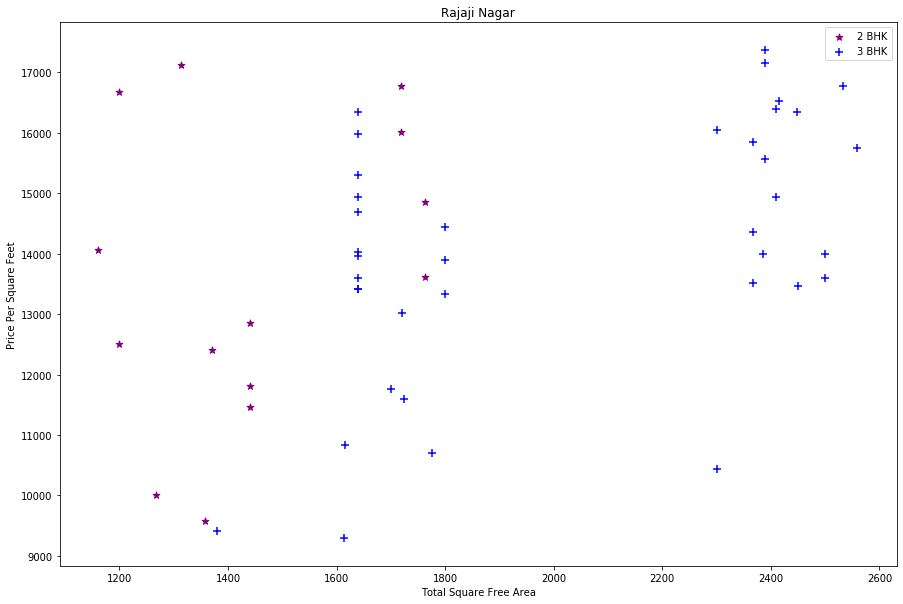

In [36]:
def plot_data(df,location):
    size2 = df[(df.location==location) & (df.size_bhk==2)]
    size3 = df[(df.location==location) & (df.size_bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(size2['total_sqft'],size2['price_per_sqft'],marker='*',color='purple',label = '2 BHK',s=50)
    plt.scatter(size3['total_sqft'],size3['price_per_sqft'],marker='+',color='blue',label = '3 BHK',s=50)
    plt.xlabel("Total Square Free Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
plot_data(df7,"Rajaji Nagar")

In some data points, the same size houses are much more expensive
removing these outliers
creating a dictionary
removing the 2 BHK apartments whose price per sqft is less than mean price per sqft of 1BHK apartment   t

{
    '1':{
        'mean':4000,
         'std':2000,
        'count':34
    },
    '2':{
        'mean':4300,
        'std':2300,
        'count':22
    },
}


In [37]:
def remove_size_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        size_stats = {}
        #print(location_df)
        for size,size_df in location_df.groupby('size_bhk'):
            size_stats[size] = {
                'mean':np.mean(size_df.price_per_sqft),
                'std':np.std(size_df.price_per_sqft),
                'count':size_df.shape[0]
            }
        for size,size_df in location_df.groupby('size_bhk'):
            stats = size_stats.get(size-1)
            if (stats and stats['count'] > 5):
                exclude_indices = np.append(exclude_indices,size_df[size_df.price_per_sqft < (stats['mean'])].index)
    return df.drop(exclude_indices,axis='index') 

df8 = remove_size_outliers(df7)
df8.shape

(7317, 7)

In [38]:
df7.head()

,location,size,total_sqft,bath,price,size_bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


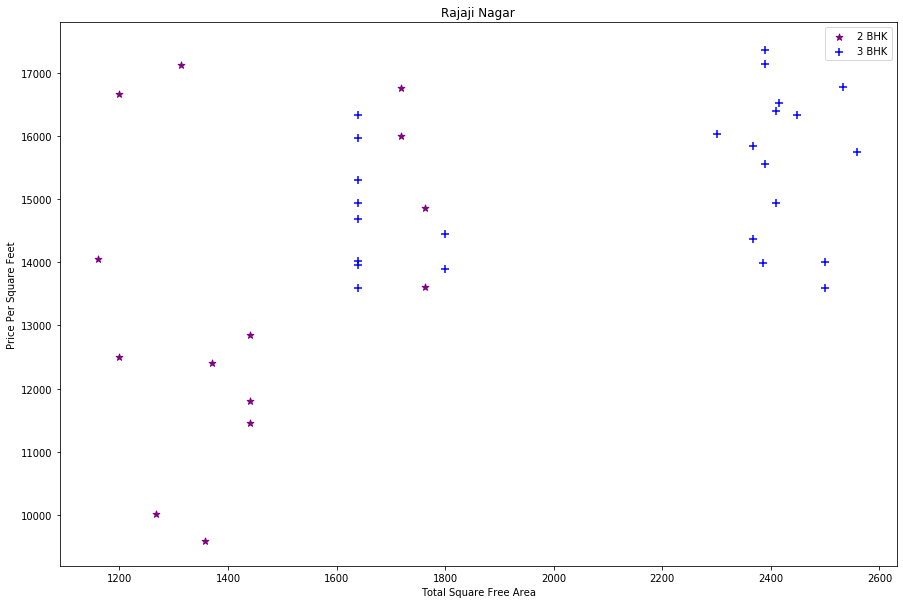

In [39]:
# plotting again to see if there is improvement
plot_data(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

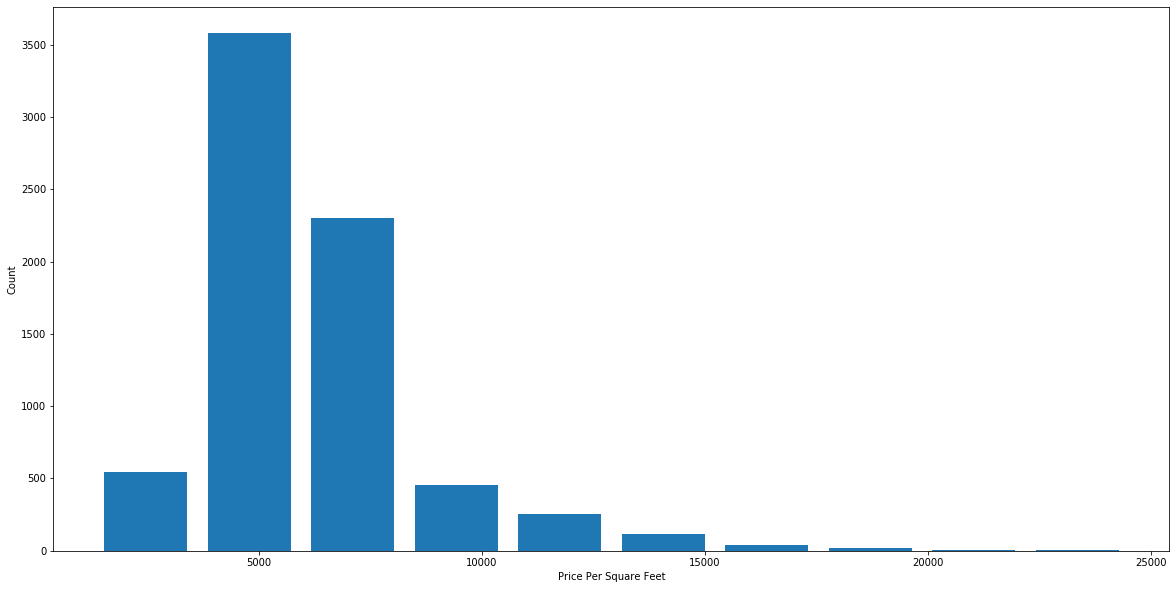

In [40]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
len(df8.bath.unique())

12

In [42]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,size_bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Room count')

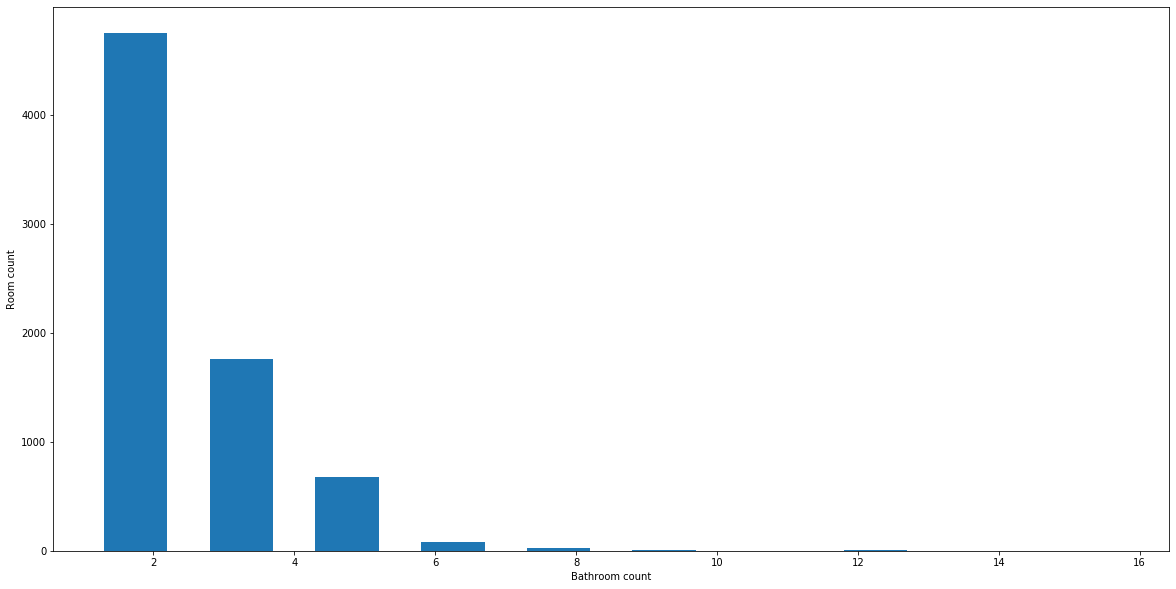

In [44]:
# generally number of bathrooms are not much greater than number of rooms
# remove outlier bath values where no of bathrooms > 2 + no of rooms
# plotting histogram for visualisation
plt.hist(df8.bath,rwidth=0.6)
plt.xlabel("Bathroom count")
plt.ylabel("Room count")

In [45]:
df8[df8.bath>df8.size_bhk+2]

,location,size,total_sqft,bath,price,size_bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [46]:
df9 = df8[df8.bath<df8.size_bhk+2]
df9.shape

(7239, 7)

In [47]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.shape

(7239, 5)

### Model Building

In [48]:
# onehotencoding for categorical data i.e location
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# drop 1 column to avoid dummy variable trap
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.shape

(7239, 245)

In [50]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,size_bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12.shape

(7239, 244)

In [52]:
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,size_bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [54]:
# splitting into training and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8629132245229443

### K-Fold Cross Validation


In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

### Grid-Search CV 
to find the best model

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    # returning resultant scores into a dataframe
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model(X,y)   

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726745,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.718916,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


 That means Linear Regression with normalize parameter as false has the best score and the model already trained can be used

### Price Prediction

In [58]:
X.columns

Index(['total_sqft', 'bath', 'size_bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [59]:
# to return the column index
np.where(X.columns == 'size_bhk')[0][0]

2

In [60]:
def predict_price(location,sqft,bath,size_bhk):
    loc_index = np.where(X.columns == location)[0][0]
    # creating an array initialised with zeroes of size = number of columns
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = size_bhk
    if (loc_index >= 0):
        x[loc_index] = 1
    #print(x)
    # prediction output will be in array, we need prediction prices directly, so accessing the first index
    return model.predict([x])[0]


In [61]:
predict_price('Whitefield',2000,3,3)

136.05919554233273

In [62]:
predict_price('Indira Nagar',2000,2,2)

273.42988053494867

### Exporting Model 

to be used for Python Flask server

In [63]:
import pickle
with open('house_prices_model_pickle','wb') as f:
    pickle.dump(model,f)

In [64]:
# besides the model, we also need to store the column info
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open ('columns.json',"w") as f:
    f.write(json.dumps(columns))